<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/module2-convolutional-neural-networks/LS_DS_432_Convolution_Neural_Networks_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

- <a href="#p1">Part 1:</a> Pre-Trained Model
- <a href="#p2">Part 2:</a> Custom CNN Model
- <a href="#p3">Part 3:</a> CNN with Data Augmentation


You will apply three different CNN models to a binary image classification model using Keras. Classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

|Mountain (+)|Forest (-)|
|---|---|
|![](https://github.com/VeraMendes/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/module2-convolutional-neural-networks/data/mountain/art1131.jpg?raw=1)|![](https://github.com/VeraMendes/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/module2-convolutional-neural-networks/data/forest/cdmc317.jpg?raw=1)|

The problem is realively difficult given that the sample is tiny: there are about 350 observations per class. This sample size might be something that you can expect with prototyping an image classification problem/solution at work. Get accustomed to evaluating several differnet possible models.

# Pre - Trained Model
<a id="p1"></a>

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D()
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)

```

The `include_top` parameter in `ResNet50` will remove the full connected layers from the ResNet model. The next step is to turn off the training of the ResNet layers. We want to use the learned parameters without updating them in future training passes. 

```python
for layer in resnet.layers:
    layer.trainable = False
```

Using the Keras functional API, we will need to additional additional full connected layers to our model. We we removed the top layers, we removed all preivous fully connected layers. In other words, we kept only the feature processing portions of our network. You can expert with additional layers beyond what's listed here. The `GlobalAveragePooling2D` layer functions as a really fancy flatten function by taking the average of each of the last convolutional layer outputs (which is two dimensional still). 

```python
x = res.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(res.input, predictions)
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

In [0]:
import numpy as np
 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API

import imageio
import matplotlib.pyplot as plt
from skimage import color, io

# instantiate model
resnet = ResNet50(weights='imagenet', include_top=False)

In [0]:
forest_example = io.imread('https://github.com/VeraMendes/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/module2-convolutional-neural-networks/data/forest/cdmc271.jpg?raw=true')
forest_example

Array([[[185, 207, 255],
        [181, 203, 252],
        [180, 201, 248],
        ...,
        [138, 144, 118],
        [137, 143, 117],
        [141, 147, 121]],

       [[170, 191, 238],
        [166, 187, 232],
        [162, 183, 228],
        ...,
        [137, 143, 117],
        [136, 142, 116],
        [138, 144, 118]],

       [[146, 168, 209],
        [143, 165, 204],
        [142, 161, 201],
        ...,
        [133, 139, 113],
        [135, 141, 115],
        [141, 147, 121]],

       ...,

       [[ 59,  56,  15],
        [ 68,  65,  24],
        [ 69,  65,  27],
        ...,
        [  9,  13,   0],
        [  7,  11,   0],
        [ 10,  15,   0]],

       [[ 51,  46,  16],
        [ 53,  48,  18],
        [ 56,  51,  21],
        ...,
        [ 33,  37,  12],
        [ 22,  27,   0],
        [ 12,  18,   0]],

       [[ 44,  38,  14],
        [ 30,  24,   0],
        [ 29,  23,   0],
        ...,
        [100, 104,  77],
        [ 89,  95,  61],
        [ 71,  77,  39]]

In [0]:
forest_example.shape

(256, 256, 3)

In [0]:
!wget 'https://github.com/VeraMendes/DS-Unit-4-Sprint-3-Deep-Learning/tree/master/module2-convolutional-neural-networks/data'

--2019-12-18 16:26:30--  https://github.com/VeraMendes/DS-Unit-4-Sprint-3-Deep-Learning/tree/master/module2-convolutional-neural-networks/data
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data’

data                    [  <=>               ]  56.98K   159KB/s    in 0.4s    

2019-12-18 16:26:31 (159 KB/s) - ‘data’ saved [58345]



In [0]:
!unzip data.zip

Archive:  data.zip
   creating: data/forest/
  inflating: data/forest/art114.jpg  
  inflating: data/forest/bost100.jpg  
  inflating: data/forest/bost101.jpg  
  inflating: data/forest/bost102.jpg  
  inflating: data/forest/bost103.jpg  
  inflating: data/forest/bost190.jpg  
  inflating: data/forest/bost98.jpg  
  inflating: data/forest/cdmc101.jpg  
  inflating: data/forest/cdmc12.jpg  
  inflating: data/forest/cdmc271.jpg  
  inflating: data/forest/cdmc277.jpg  
  inflating: data/forest/cdmc278.jpg  
  inflating: data/forest/cdmc280.jpg  
  inflating: data/forest/cdmc281.jpg  
  inflating: data/forest/cdmc282.jpg  
  inflating: data/forest/cdmc283.jpg  
  inflating: data/forest/cdmc284.jpg  
  inflating: data/forest/cdmc290.jpg  
  inflating: data/forest/cdmc291.jpg  
  inflating: data/forest/cdmc292.jpg  
  inflating: data/forest/cdmc293.jpg  
  inflating: data/forest/cdmc306.jpg  
  inflating: data/forest/cdmc313.jpg  
  inflating: data/forest/cdmc315.jpg  
  inflating: data/fore

In [0]:
import os
# from PIL import Image


images = list()
labels = list()

for folder in os.listdir('./data'):
  for file in os.listdir('./data/'+folder):
    if file[-3:] == 'jpg':
      path = os.path.join('./data', folder, file)
      image = io.imread(path)
      images.append(image)
      labels.append(folder)

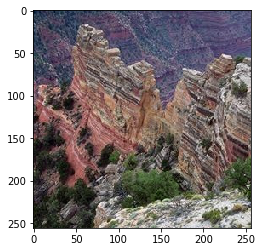

In [0]:
# testing an image
plt.imshow(images[50])

In [0]:
# checking label
print(labels[50])

mountain


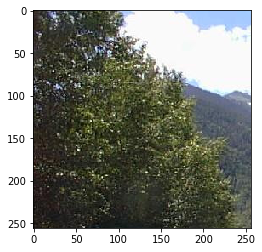

In [0]:
# testing another image
plt.imshow(images[-1])

In [0]:
# checking label
print(labels[-1])

forest


In [0]:
# forest = 0
# mountain = 1

# Create a y for the labels

binary_class = list()

for label in labels:
  if label == 'forest':
    binary_class.append(0)
  else:
    binary_class.append(1)

In [0]:
type(binary_class)

list

In [0]:
images_arrays = [np.asarray(i) for i in images]
type(images_arrays[0])

numpy.ndarray

In [0]:
type(images_arrays)

list

In [0]:
# Normalize values

images_arrays = np.array(images_arrays)

In [0]:
images_arrays = images_arrays / 255

In [0]:
images_arrays[0]

array([[[0.01176471, 0.29019608, 0.64313725],
        [0.01568627, 0.29019608, 0.63529412],
        [0.02352941, 0.28627451, 0.62745098],
        ...,
        [0.75294118, 0.77647059, 0.76078431],
        [0.63137255, 0.65490196, 0.63921569],
        [0.51372549, 0.5372549 , 0.52156863]],

       [[0.01568627, 0.29019608, 0.63529412],
        [0.01568627, 0.29019608, 0.63529412],
        [0.01568627, 0.29019608, 0.63529412],
        ...,
        [0.76470588, 0.78823529, 0.77254902],
        [0.75686275, 0.78039216, 0.76470588],
        [0.76470588, 0.78823529, 0.77254902]],

       [[0.02745098, 0.29019608, 0.63137255],
        [0.01568627, 0.29019608, 0.63529412],
        [0.01176471, 0.29019608, 0.64313725],
        ...,
        [0.69803922, 0.72156863, 0.70588235],
        [0.70588235, 0.72941176, 0.71372549],
        [0.73333333, 0.75686275, 0.74117647]],

       ...,

       [[0.4745098 , 0.62352941, 0.71372549],
        [0.4745098 , 0.62352941, 0.71372549],
        [0.47843137, 0

In [0]:
# freeze resnet layers
for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
# model = Sequential()

# model.add(ResNet50(include_top = False, pooling = GlobalAveragePooling2D, weights = 'imagenet'))
# model.add(Dense(1,activation = 'sigmoid'))
# model.layers[0].trainable = False
# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
dense_1 (Dense)              (None, None, None, 1)     2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
# compile model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
y = np.asarray(binary_class)

In [0]:
images_arrays.shape

(702, 256, 256, 3)

In [0]:
y.shape

(702,)

In [0]:
model.fit(images_arrays, y, epochs=5)

Train on 702 samples
Epoch 1/5
702/702 [==============================] - 239s 341ms/sample - loss: 0.2329 - acc: 0.9174
Epoch 2/5
702/702 [==============================] - 235s 335ms/sample - loss: 0.0755 - acc: 0.9758
Epoch 3/5
702/702 [==============================] - 237s 338ms/sample - loss: 0.0414 - acc: 0.9858
Epoch 4/5
702/702 [==============================] - 234s 334ms/sample - loss: 0.0278 - acc: 0.9900
Epoch 5/5
702/702 [==============================] - 235s 334ms/sample - loss: 0.0028 - acc: 1.0000


In [0]:
scores = model.evaluate(images_arrays, y)
print(f'{model.metrics_names[1]}: {scores[1]*100}%')

702/702 [==============================] - 185s 263ms/sample - loss: 0.8612 - acc: 0.5328
acc: 53.27635407447815%


## Load in Data

![skimage-logo](https://scikit-image.org/_static/img/logo.png)

Check out out [`skimage`](https://scikit-image.org/) for useful functions related to processing the images. In particular checkout the documentation for `skimage.io.imread_collection` and `skimage.transform.resize`.

## Instatiate Model

/Users/jonathansokoll/anaconda3/envs/U4-S3-DNN/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


## Fit Model

Train on 561 samples, validate on 141 samples
Epoch 1/5
561/561 [==============================] - 39s 69ms/sample - loss: 0.1216 - accuracy: 0.9715 - val_loss: 1.4221 - val_accuracy: 0.0000e+00
Epoch 2/5
561/561 [==============================] - 35s 62ms/sample - loss: 0.0410 - accuracy: 0.9875 - val_loss: 2.9222 - val_accuracy: 0.0000e+00
Epoch 3/5
561/561 [==============================] - 35s 62ms/sample - loss: 0.0646 - accuracy: 0.9697 - val_loss: 0.9962 - val_accuracy: 0.0000e+00
Epoch 4/5
561/561 [==============================] - 39s 70ms/sample - loss: 0.0723 - accuracy: 0.9733 - val_loss: 0.2627 - val_accuracy: 1.0000
Epoch 5/5
561/561 [==============================] - 38s 68ms/sample - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.4859 - val_accuracy: 1.0000


# Custom CNN Model

In this step, write and train your own convolutional neural network using Keras. You can use any architecture that suits you as long as it has at least one convolutional and one pooling layer at the beginning of the network - you can add more if you want. 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 215, 215, 32)      9632      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

In [0]:
# Fit Model

Train on 561 samples, validate on 141 samples
Epoch 1/5
561/561 [==============================] - 18s 32ms/sample - loss: 0.2667 - accuracy: 0.9073 - val_loss: 0.1186 - val_accuracy: 0.9858
Epoch 2/5
561/561 [==============================] - 18s 32ms/sample - loss: 0.2046 - accuracy: 0.9073 - val_loss: 0.3342 - val_accuracy: 0.8511
Epoch 3/5
561/561 [==============================] - 18s 32ms/sample - loss: 0.1778 - accuracy: 0.9287 - val_loss: 0.2746 - val_accuracy: 0.8723
Epoch 4/5
561/561 [==============================] - 18s 32ms/sample - loss: 0.1681 - accuracy: 0.9323 - val_loss: 0.8487 - val_accuracy: 0.5957
Epoch 5/5
561/561 [==============================] - 18s 32ms/sample - loss: 0.1606 - accuracy: 0.9394 - val_loss: 0.3903 - val_accuracy: 0.8582


In [0]:
# instantiate model (architecture)
# compile model
# fit model

from tensorflow.keras.models import Sequential, Model # <- May Use
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [0]:
# Setup Architecture

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [0]:
# compile model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.fit(images_arrays, y, epochs=5)

Train on 702 samples
Epoch 1/5
702/702 [==============================] - 78s 111ms/sample - loss: 0.9859 - acc: 0.7393
Epoch 2/5
702/702 [==============================] - 74s 106ms/sample - loss: 0.6517 - acc: 0.7151
Epoch 3/5
702/702 [==============================] - 75s 107ms/sample - loss: 0.5042 - acc: 0.6809
Epoch 4/5
702/702 [==============================] - 75s 107ms/sample - loss: 0.4649 - acc: 0.8020
Epoch 5/5
702/702 [==============================] - 75s 107ms/sample - loss: 0.4183 - acc: 0.8761


In [0]:
scores = model.evaluate(images_arrays, y)
print(f'{model.metrics_names[1]}: {scores[1]*100}%')

702/702 [==============================] - 22s 31ms/sample - loss: 0.4273 - acc: 0.7991
acc: 79.91452813148499%


In [0]:
# another model

model = Sequential()
model.add(Conv2D(28, (3,3), activation='softmax', input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(54, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(54, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(54, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(54, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(54, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 28)      784       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 28)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 54)      13662     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 54)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 54)        26298     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 54)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 54)       

In [0]:
# compile model
model.compile(optimizer = 'nadam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['categorical_accuracy'])

In [0]:
model.fit(images_arrays, y, epochs=5)

Train on 702 samples
Epoch 1/5
702/702 [==============================] - 97s 138ms/sample - loss: 0.6932 - categorical_accuracy: 0.3191
Epoch 2/5
702/702 [==============================] - 94s 134ms/sample - loss: 0.6928 - categorical_accuracy: 0.2792
Epoch 3/5
702/702 [==============================] - 93s 132ms/sample - loss: 0.6774 - categorical_accuracy: 0.2023
Epoch 4/5
702/702 [==============================] - 94s 134ms/sample - loss: 0.5642 - categorical_accuracy: 0.4957
Epoch 5/5
702/702 [==============================] - 94s 134ms/sample - loss: 0.4204 - categorical_accuracy: 0.4630


In [0]:
scores = model.evaluate(images_arrays, y)
print(f'{model.metrics_names[1]}: {scores[1]*100}%')

702/702 [==============================] - 27s 38ms/sample - loss: 0.3271 - categorical_accuracy: 0.4544
categorical_accuracy: 45.44159471988678%


# Custom CNN Model with Image Manipulations
## *This a stretch goal, and it's relatively difficult*

To simulate an increase in a sample of image, you can apply image manipulation techniques: cropping, rotation, stretching, etc. Luckily Keras has some handy functions for us to apply these techniques to our mountain and forest example. Check out these resources to help you get started: 

1. [Keras `ImageGenerator` Class](https://keras.io/preprocessing/image/#imagedatagenerator-class)
2. [Building a powerful image classifier with very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
 

In [0]:
# State Code for Image Manipulation Here

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language